In [1]:
import tensorflow as tf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


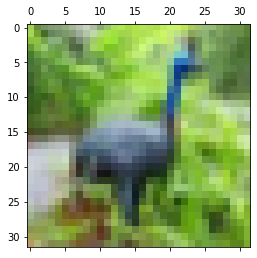

In [4]:
plt.matshow(X_train[6])

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Data standardization

In [8]:
# normalization
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
from tensorflow.keras import layers,models
model=keras.Sequential([
        #layer 1
        keras.layers.Conv2D(filters=32,activation="relu",kernel_size=(2,2),input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        #layer 2
        keras.layers.Conv2D(filters=64,activation="relu",kernel_size=(2,2),input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        #layer 3
        keras.layers.Conv2D(filters=128,activation="relu",kernel_size=(2,2),input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        #layer 4
        keras.layers.Conv2D(filters=256,activation="relu",kernel_size=(2,2),input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
    
        keras.layers.Flatten(),

        keras.layers.Dense(300,activation="relu"),
        keras.layers.Dense(200,activation="relu"),
        keras.layers.Dense(100,activation="relu"),
        keras.layers.Dense(10,activation="softmax")]
        )



In [ ]:
# loss = for  multiclass classificattion = 'sparse_categoorical_crossentropy'
# loss = for binary classification = 'categorical_crossentropy'

# compile your model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 100)


Epoch 1/100
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6484 - accuracy: 0.3745
Epoch 2/100
1563/1563 [==============================] - 90s 58ms/step - loss: 1.2245 - accuracy: 0.5524
Epoch 3/100
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0247 - accuracy: 0.6333
Epoch 4/100
1563/1563 [==============================] - 90s 58ms/step - loss: 0.8915 - accuracy: 0.6830
Epoch 5/100
1563/1563 [==============================] - 95s 61ms/step - loss: 0.7958 - accuracy: 0.7193
Epoch 6/100
1563/1563 [==============================] - 90s 57ms/step - loss: 0.7151 - accuracy: 0.7485
Epoch 7/100
1563/1563 [==============================] - 89s 57ms/step - loss: 0.6537 - accuracy: 0.7695
Epoch 8/100
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6013 - accuracy: 0.7869
Epoch 9/100
1563/1563 [==============================] - 89s 57ms/step - loss: 0.5474 - accuracy: 0.8086
Epoch 10/100
1563/1563 [==============================]

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.8693 - accuracy: 0.7092


[0.8692916035652161, 0.7092000246047974]

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0